In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from matplotlib.colors import ListedColormap

import BaseModelFunctions as bmf

In [ ]:
# Set board size
m = 100
n = 100

# Set parameters
a = [1,0.5,0.1] # Affluence group parameters 
p = [0.1, 0.4, 0.5] # Initial affluence proportions 
v = 5 # Initial house price
weights = [0.75, 0.75] # Inflationary parameter and amenities parameter
empty_ratio = 0.2 # Proportion of grid empty
amenities = m # Number of amenities
r = 4 # Radius to consider amenities in

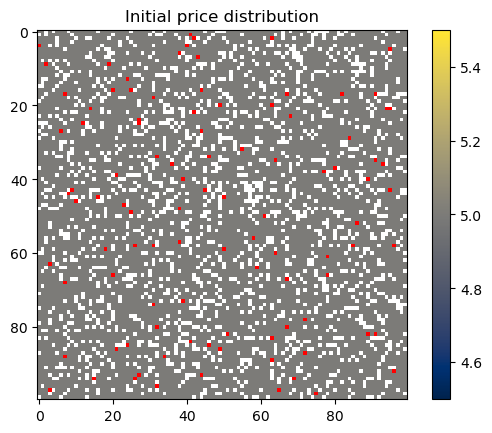

In [6]:
# Initialize house price grid 
initial_prices = bmf.initial_price_dist(m, n, v, amenities, empty_ratio)
# display(initial_prices)
bmf.plot_grid(initial_prices)
plt.title("Initial price distribution")
plt.show()

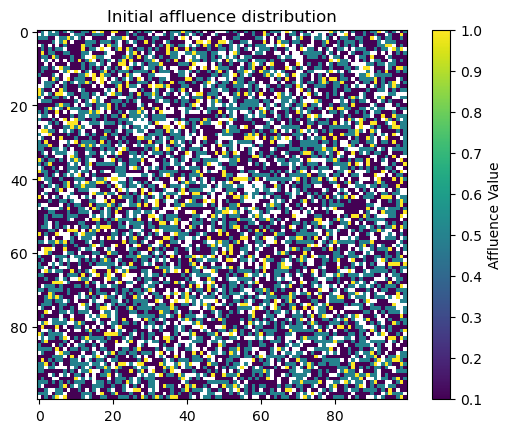

In [17]:
# Initialize affluence grid 
affluence_grid = bmf.initial_affluence_dist(initial_prices, a, p)
# display(affluence_grid)

# Separate plotting mechanism - does not do well with color map defined for house value grid 
plt.figure()
plt.imshow(affluence_grid, cmap='viridis', interpolation='nearest') 
plt.colorbar(label='Affluence Value')  
plt.title("Initial affluence distribution")
plt.show()

Testing first house values calculation:


array([[4.0375, 3.85  ,    nan, ...,    nan, 4.25  , 3.85  ],
       [   nan, 4.0375,    nan, ..., 3.85  , 4.25  , 3.85  ],
       [4.4125, 4.225 , 4.0375, ..., 4.25  , 4.25  , 3.85  ],
       ...,
       [4.625 , 4.8125, 5.5   , ...,    nan, 3.85  , 4.25  ],
       [4.0375, 4.225 , 4.8125, ..., 3.85  , 3.85  ,    nan],
       [   nan, 4.0375, 4.225 , ..., 3.85  , 3.85  , 3.85  ]])

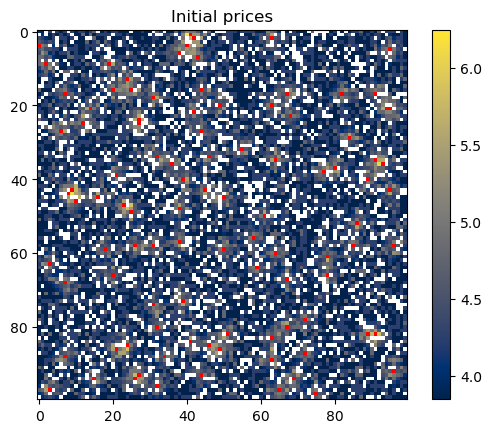

In [15]:
# Test the new functions
house_vals = bmf.update_house_prices(initial_prices, affluence_grid, weights, r) 
print("Testing first house values calculation:")
display(house_vals)
# Plot the initial house values 
fig, ax = plt.subplots()
img = bmf.plot_grid(house_vals)
plt.title(f"Initial prices")
plt.show()

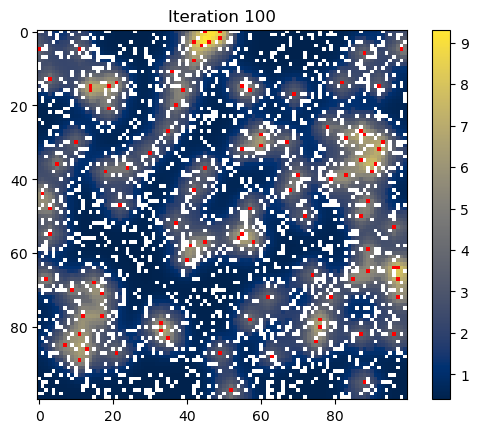

In [4]:
# Animation cell 

# Plot the initial house values 
fig, ax = plt.subplots()
img = bmf.plot_grid(house_vals)
plt.title(f"Initial prices")
plt.pause(0.5) 
clear_output(wait=True) 

# Plot the iterations 
n_steps = 100
for i in range(n_steps):
   house_vals, affluence_grid = bmf.new_iteration(house_vals, affluence_grid, weights, r)
   img = bmf.plot_grid(house_vals)  
   plt.title(f"Iteration {i + 1}")
   plt.pause(0.001)  
   clear_output(wait=True) 

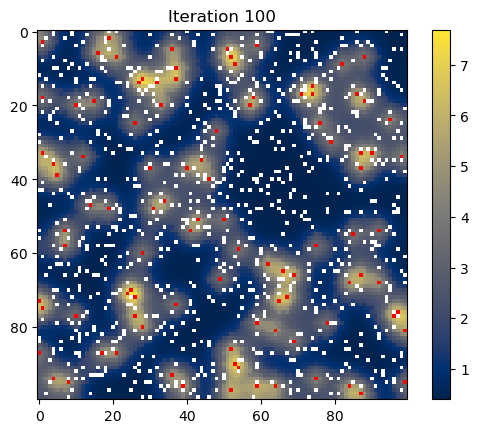

In [5]:
# Implementing adding houses and modifying houses functions

# Initialize house price grid 
initial_prices = bmf.initial_price_dist(m, n, v, amenities, empty_ratio)

# Initialize affluence grid 
affluence_grid = bmf.initial_affluence_dist(initial_prices, a, p)

house_vals = bmf.update_house_prices(initial_prices, affluence_grid, weights, r) 

# Plot the initial house values 
fig, ax = plt.subplots()
img = bmf.plot_grid(house_vals)
plt.title(f"Initial prices")
plt.pause(1) 
clear_output(wait=True) 

# Plot the iterations 
# Add 1000 random houses with price 5 at iteration 25
# Modify 1000 random existing houses to price 10 at iteration 50
n_steps = 100
for i in range(n_steps):
    if i == 25:
        house_vals, affluence_grid = bmf.add_new_houses(
            house_vals, affluence_grid, a, p, num_houses=1000, random=True, pos=None, value=5
            )
    if i == 50:
        house_vals = bmf.modify_existing_prices(
            house_vals, num_houses=1000, random=True, pos=None, new_value=10
        )
    house_vals, affluence_grid = bmf.new_iteration(house_vals, affluence_grid, weights, r)
    img = bmf.plot_grid(house_vals)  
    plt.title(f"Iteration {i + 1}")
    plt.pause(0.001)  
    clear_output(wait=True) 